# Problem Set 5: Trees, Forests, and Networks


## Part 1: Exploring The Titanic

Your mission for this problem set is to use your knowledge of supervised machine learning to try to predict which passengers aboard the Titanic were most likely to survive. The prompts for this part of the problem set are deliberately vague - the goal is to leave it up to you how to structure (most of) your analysis. We **highly recommend** you closely go over the entire problem set once before starting; this is important, so that you understand the sequence of steps and not perform redundant work.

To get started, read about the prediction problem on [Kaggle](https://www.kaggle.com/c/titanic). Then, download the data [here](https://www.kaggle.com/c/titanic/data) - you'll need the `train.csv` data. Treat this as your entire dataset, and further build train and test splits from this dataset whenever required. 

### 1.1 Exploratory data analysis

Create at least 3 figures and/or tables that help give you a feel for the data. Make sure to at least check at least the following - 

1) the data type of each variable and variables that have missing observations 

2) understand the distribution of each variable (and determine whether the variables should be standardized or not)

3) are any of the potential predictor variables (i.e., anything execpt for survival) collinear or highly correlated? 

Remember that this is the EDA phase, and we want to save pre-processing steps like imputations, transformations etc. and feature engineering for later. Feel free to create more charts and tables if they help your analysis.

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings

In [38]:
train = pd.read_csv('train.csv') 
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

### Data Type

In [130]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 331 to 102
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      712 non-null    int64  
 1   Sex           712 non-null    int64  
 2   Age           712 non-null    float64
 3   SibSp         712 non-null    float64
 4   Parch         712 non-null    float64
 5   Fare          712 non-null    float64
 6   logFare       712 non-null    float64
 7   Embarked_0.0  712 non-null    uint8  
 8   Embarked_1.0  712 non-null    uint8  
 9   Embarked_2.0  712 non-null    uint8  
 10  Embarked_S    712 non-null    uint8  
 11  Pclass_1      712 non-null    uint8  
 12  Pclass_2      712 non-null    uint8  
 13  Pclass_3      712 non-null    uint8  
dtypes: float64(5), int64(2), uint8(7)
memory usage: 49.4 KB


### Missing values

In [133]:
def count_nulls(df):
    null_counter = df.isnull().sum(axis=0)
    null_counter = null_counter[null_counter > 0]
    null_percent = df.isnull().sum(axis=0) / df.shape[0] * 100
    null_percent = null_percent[null_percent > 0]
    null_df = pd.concat([null_counter,null_percent],axis=1)
    null_df.columns = ['count','percent']
    display(null_df)
    
print(count_nulls(train))

count    percent
Age         177  19.865320
Cabin       687  77.104377
Embarked      2   0.224467

None


### Distribution of Predictor Variables. 

<AxesSubplot:xlabel='Survived', ylabel='Count'>

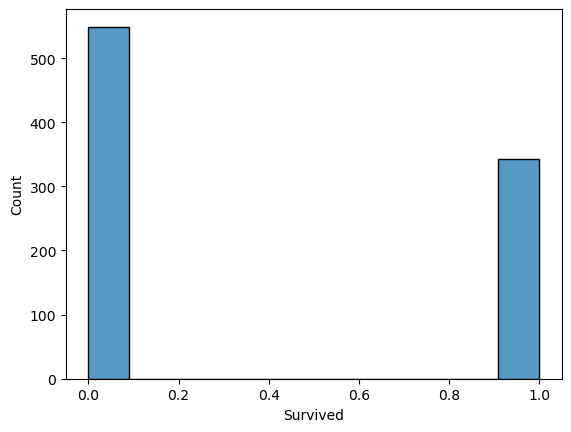

In [11]:
sns.histplot(data=train, x='Survived')

<AxesSubplot:xlabel='Pclass', ylabel='Count'>

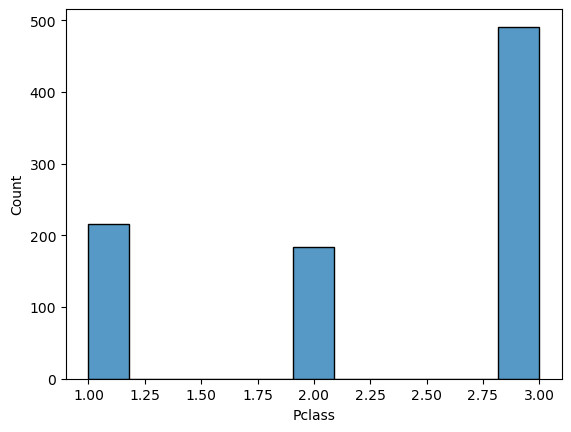

In [14]:
sns.histplot(data=train, x='Pclass')

<AxesSubplot:xlabel='Sex', ylabel='Count'>

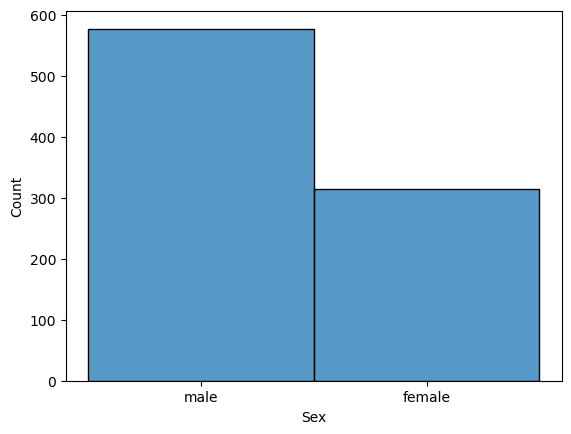

In [15]:
sns.histplot(data=train, x='Sex')

<AxesSubplot:xlabel='Age', ylabel='Count'>

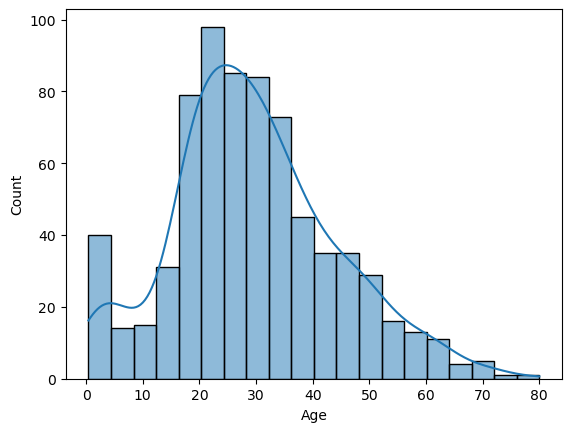

In [16]:
sns.histplot(data=train, x='Age', kde=True)

<AxesSubplot:xlabel='SibSp', ylabel='Count'>

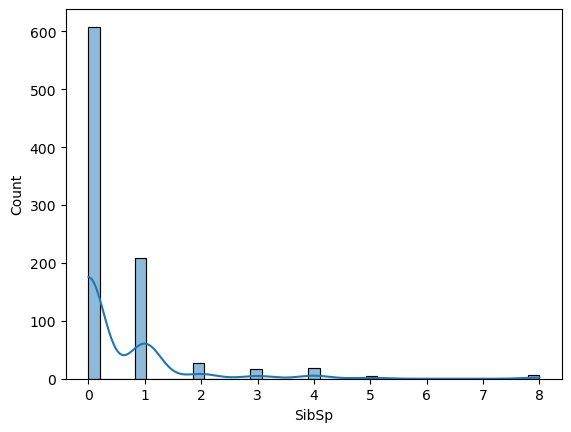

In [17]:
sns.histplot(data=train, x='SibSp', kde=True)

<AxesSubplot:xlabel='Parch', ylabel='Count'>

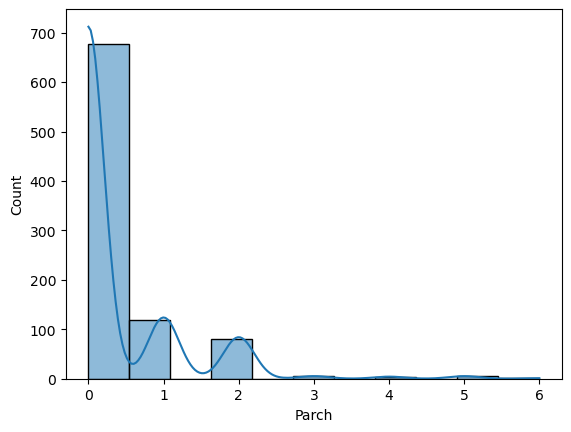

In [18]:
sns.histplot(data=train, x='Parch', kde=True)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

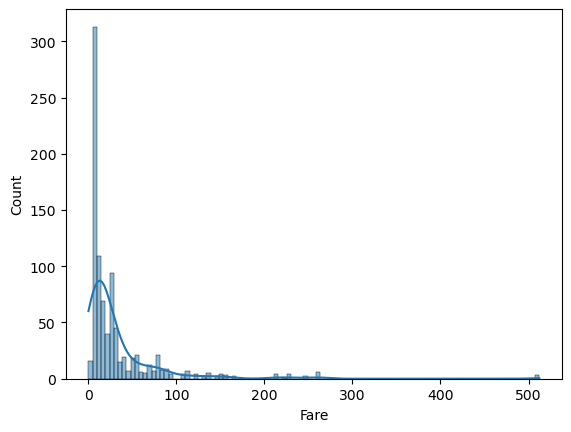

In [19]:
sns.histplot(data=train, x='Fare', kde=True)

<AxesSubplot:xlabel='Embarked', ylabel='Count'>

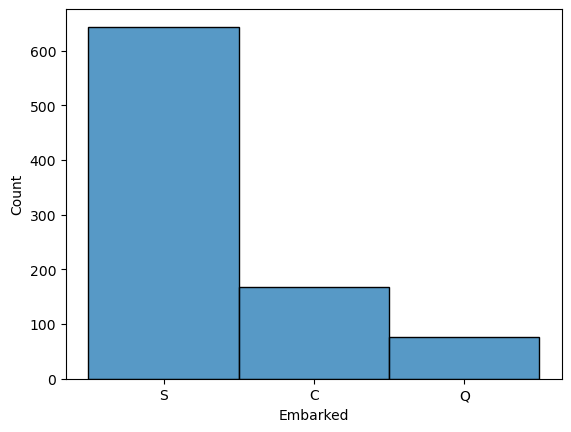

In [21]:
sns.histplot(data=train, x='Embarked')

### Correlations

          Survived    Pclass       Sex       Age     SibSp     Parch  \
Survived  1.000000 -0.338481 -0.543351 -0.077221 -0.035322  0.081629   
Pclass   -0.338481  1.000000  0.131900 -0.369226  0.083081  0.018443   
Sex      -0.543351  0.131900  1.000000  0.093254 -0.114631 -0.245489   
Age      -0.077221 -0.369226  0.093254  1.000000 -0.308247 -0.189119   
SibSp    -0.035322  0.083081 -0.114631 -0.308247  1.000000  0.414838   
Parch     0.081629  0.018443 -0.245489 -0.189119  0.414838  1.000000   
Fare      0.257307 -0.549500 -0.182333  0.096067  0.159651  0.216225   
Embarked  0.108669  0.043835 -0.118593  0.012186 -0.060606 -0.079320   

              Fare  Embarked  
Survived  0.257307  0.108669  
Pclass   -0.549500  0.043835  
Sex      -0.182333 -0.118593  
Age       0.096067  0.012186  
SibSp     0.159651 -0.060606  
Parch     0.216225 -0.079320  
Fare      1.000000  0.063462  
Embarked  0.063462  1.000000  


<AxesSubplot:>

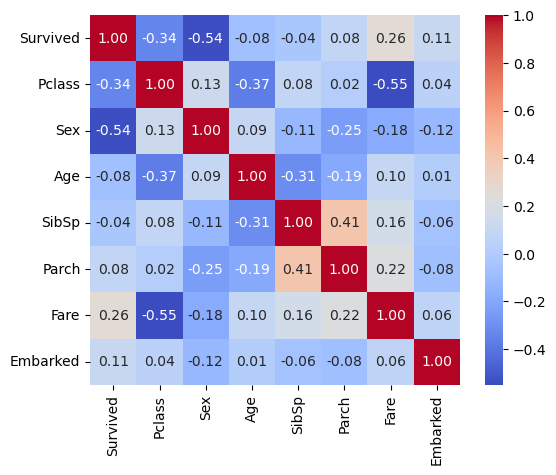

In [48]:
df = train.copy()

df['Sex'] = df['Sex'].replace({'female': 0, 'male': 1})
df['Embarked'] = df['Embarked'].replace({'S': 0, 'C': 1, 'Q':2})

corr_columns = df.loc[:, ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
corr = corr_columns.corr()
print(corr)

sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', square=True)

### 1.2 Correlates of survival

Use whatever methods you can think of to try and figure out what factors seem to determine whether or not a person would survive the sinking of the Titanic. You can start with simple correlations, but will likely also want to use multiple regression and/or other methods in your toolkit. Try at least 3 different methods. What do you conclude?

### Simple correlations. 

In [ ]:
From what we have done above, the results of simple correlations indicates that Sex is the most relevent variables correlated to the survived. Ticket Class also seems to plays some role determining the survival. 

### Multiple Regression.

In [ ]:
From the correlation test we did above, we find that sex and Pclass indicate a positive moderate correlation with survived. However, Pclass also has a positive moderatee correlation with Age and Fare. 
Thus, I am going to do a multiple regression test to see if they both contribute on the survival. 


In [49]:
# Deal with missing values of age. 
# Since distribution of age is skwed to the right, I decide to use median values to replace the NA. 
df['Age'] = df['Age'].fillna(df['Age'].median())

In [50]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
X = df[['Pclass', 'Sex', 'Fare', 'Age']]
y = df['Survived']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     137.6
Date:                Thu, 06 Apr 2023   Prob (F-statistic):           1.82e-91
Time:                        01:53:54   Log-Likelihood:                -406.67
No. Observations:                 891   AIC:                             823.3
Df Residuals:                     886   BIC:                             847.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2728      0.070     18.104      0.0

In [ ]:
The result shows that ticket class, age, and sex all play important role in survival since the p-values is less than 0.05. 

### Logistic regression

In [8]:
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf
model_log = smf.logit('Survived ~ Age + Sex + Pclass + Fare', data=df).fit()

# Print the model summary
print(model_log.summary())

Optimization terminated successfully.
         Current function value: 0.452022
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      886
Method:                           MLE   Df Model:                            4
Date:                Thu, 06 Apr 2023   Pseudo R-squ.:                  0.3212
Time:                        01:07:05   Log-Likelihood:                -402.75
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 3.282e-81
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6553      0.509      9.153      0.000       3.659       5.652
Age           -0.0331      0.

In [ ]:
The result also shows that ticket class, age, and sex all play important role in survival since the p-values is less than 0.05. 

### 1.3 Preprocessing steps
Take whatever pre-processing steps you believe are necessary for each variable in the dataset (for example, these might include normalization, standardization, log transforms, dummy-encoding, or dropping a variable altogether). For now, you can ignore null values in the dataset --- we'll come back to those later. __Create a table describing the preprocessing step for each variable.__ Make sure the variables are alphabetized and your table is well-organized.

In [51]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# I have already replaced the missing values for age and changed sex and embarked variables into numeric format.  

# Remove unused columns
df = df.drop(['Cabin', 'Name', 'PassengerId', 'Ticket'], axis=1)

# Replace NA. 
df['Embarked'] = df['Embarked'].fillna('S')

# Transformation.
df['logFare'] = np.log1p(df['Fare'])

# Standardization
scaler = StandardScaler()
df[['Age', 'logFare', 'Parch', 'SibSp']] = scaler.fit_transform(df[['Age', 'logFare', 'Parch', 'SibSp']])
df = df.drop(['Fare'], axis = 1)

# Dummy-encode 'Embarked' and 'Pclass'
df = pd.get_dummies(df, columns= ['Pclass', 'Embarked'])

import pandas as pd
preprocess = {'Variable': ['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket'],
             'Preprocessing Step': ['Impute missing values with median age, scale using standardization or normalization',
                               'Drop variable',
                               'Impute missing values with mode, dummy-encode',
                               'Impute missing values with median fare, scale using standardization or normalization',
                               'Drop variable',
                               'Scale using standardization or normalization, log transformation',
                               'Drop variable',
                               'Dummy-encode',
                               'Map to binary variable (0 = female, 1 = male)',
                               'Scale using standardization or normalization',
                               'No preprocessing',
                               'Drop variable']
        }


preprocess = pd.DataFrame(preprocess)
# Show the entire summary_df with no truncation in any cell and no index
pd.set_option('display.max_colwidth', None) 
pd.set_option('display.max_rows', None)
preprocess

Variable  \
0           Age   
1         Cabin   
2      Embarked   
3          Fare   
4          Name   
5         Parch   
6   PassengerId   
7        Pclass   
8           Sex   
9         SibSp   
10     Survived   
11       Ticket   

                                                                      Preprocessing Step  
0    Impute missing values with median age, scale using standardization or normalization  
1                                                                          Drop variable  
2                                          Impute missing values with mode, dummy-encode  
3   Impute missing values with median fare, scale using standardization or normalization  
4                                                                          Drop variable  
5                       Scale using standardization or normalization, log transformation  
6                                                                          Drop variable  
7                                                                           Dummy-encode  
8                                          Map to binary variable (0 = female, 1 = male)  
9                                           Scale using standardization or normalization  
10                                                                      No preprocessing  
11                                                                         Drop variable

## Part 2: Decision Trees
### 2.1 Decision Tree
Using the basic [Decision Tree Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)  in sklearn, fit a model to predict titanic survival, using 10-fold cross-validation. For this and the following problems, you should set aside some (20%) of your training data as held-out test data, prior to cross-validation. 

Begin by using the default hyperparameters, and report the average training and cross-validated accuracy across the 10 folds.  Then, fit a single decision tree model on all of the training data (i.e., no cross-validation in this particular step), and report the performance of this fitted model on the held-out test data -- how does it compare to the cross-validated accuracy? Finally, show a diagram of this tree (at least the first three levels of splits), and provide a couple sentences interpreting the tree diagram.

NOTE - You may drop columns with null values for now; we'll come back to those columns later in the problem set.

In [58]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Survived'], axis=1),
                                                    df['Survived'], test_size=0.2, random_state=42)

# Fit decision tree with 10-fold cross-validation
clf = DecisionTreeClassifier(random_state=42)
cv_scores = cross_val_score(clf, X_train, y_train, cv=10)

# Tarining accuracy and cross-validated accuracy.
clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)
print('Training Set Accuracy: ', round(accuracy_score(y_train, y_pred), 3))
print('Cross-validated accuracy: {:.3f}'.format(cv_scores.mean(),cv_scores.std()))

# Fit the model
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Hold-out Test Set Accuracy: ', round(accuracy_score(y_test, y_pred), 3))

Training Set Accuracy:  0.979
Cross-validated accuracy: 0.756
Hold-out Test Set Accuracy:  0.777


Traning accuracy is higher than Cross-validated accuracy. Thus, it may produce some overfitting.

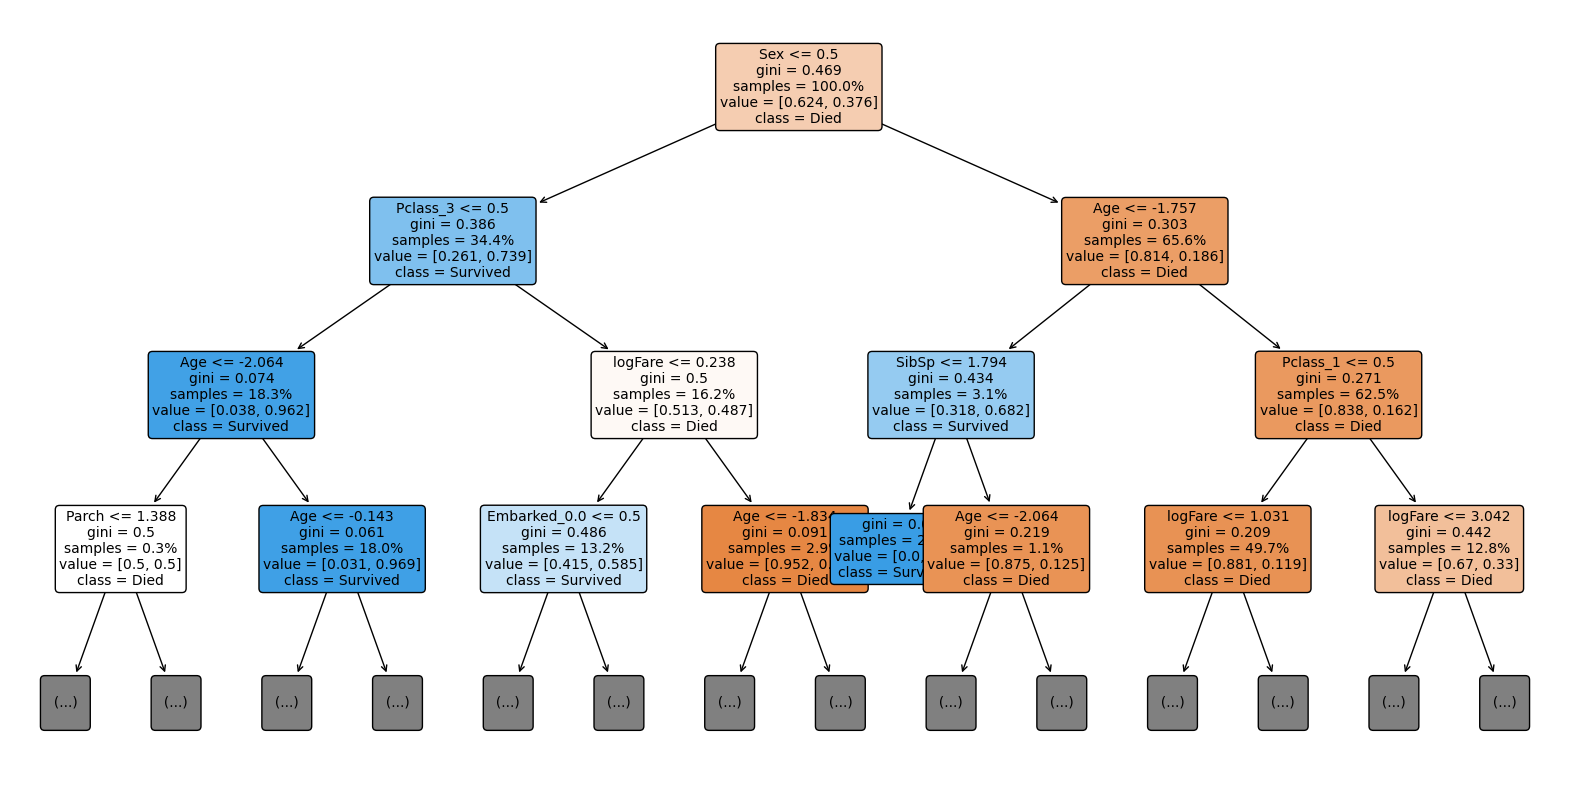

In [59]:
# Plot the tree

from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X_train.columns, class_names=['Died', 'Survived'], filled=True,fontsize=10, rounded=True, proportion=True, max_depth=3)
plt.show()

The first split is based on sex, with subject that are females. Then we can make decision based on whether female has the ticket class not equal to 3 and Age is less than 2 separately. Then based on their decision, we can further make decision more deeply. 

### 2.2 Hyperparameter: Maximum Depth

Use all of the training data (minus the held-out test data) to re-fit a single decision tree with `max_depth = 4` (i.e., no cross-validation). Show the tree diagram and also plot the feature importance. What do you observe? How does the performance of this tree compare to the tree from 2.1?

In [60]:
# Fit decision tree with 10-fold cross-validation.
clf = DecisionTreeClassifier(random_state=42, max_depth=4)
cv_scores = cross_val_score(clf, X_train, y_train, cv=10)

# Training set accuracy and cross-validated accuracy.
clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)
print('Training Set Accuracy: ', round(accuracy_score(y_train, y_pred), 3))
print('Cross-validated accuracy: {:.3f}'.format(cv_scores.mean(),cv_scores.std()))

# Fit the model
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Hold-out Test Set Accuracy: ', round(accuracy_score(y_test, y_pred), 3))

Training Set Accuracy:  0.84
Cross-validated accuracy: 0.812
Hold-out Test Set Accuracy:  0.799


The training accuracy is less than previous one. But the cross validation accuracy and test accuracy are both higher than previously. The graph does not change. 

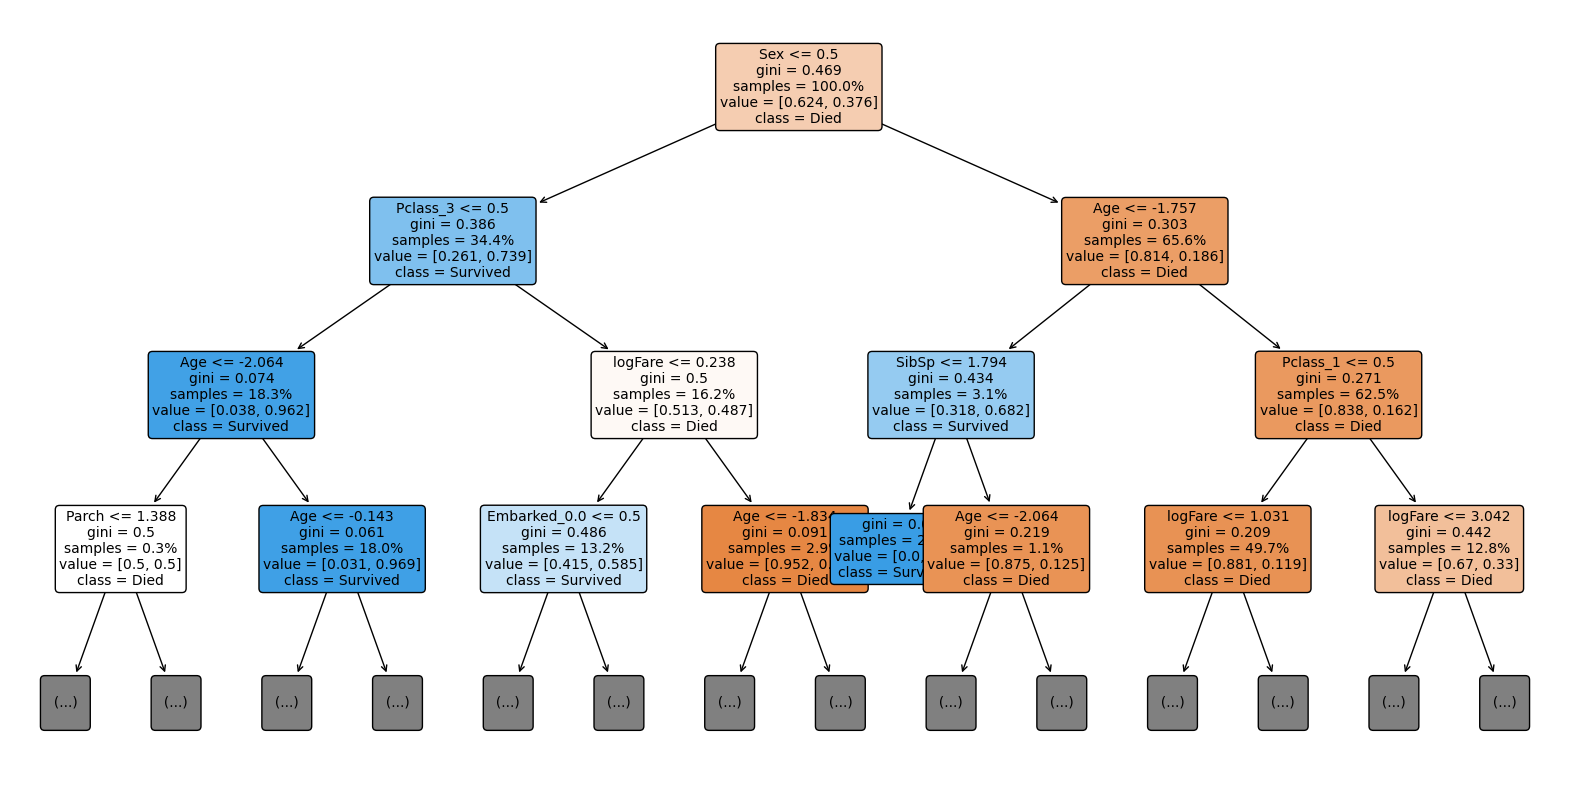

In [61]:
# plot the tree

from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X_train.columns, class_names=['Died', 'Survived'], filled=True,fontsize=10, rounded=True, proportion=True, max_depth=3)
plt.show()

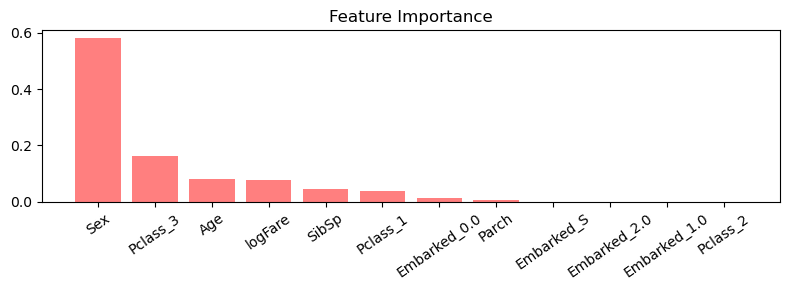

In [56]:
# Feature importance
importance = clf.feature_importances_
plt.figure(figsize=(8, 3))

# Sort the feature importance 
idx = np.argsort(importance)[::-1]
plt.bar(X_train.columns[idx], importance[idx], color='red', align='center', alpha=0.5) 
plt.title('Feature Importance')
plt.xticks(rotation=35)
plt.tight_layout()
plt.show()

### 2.3  Tuning Hyperparameters
The built-in algorithm you are using has several parameters which you can tune. Using cross-validation, show how the choice of these parameters affects performance.

First, show how `max_depth` affects train and cross-validated accuracy. On a single axis, plot train and cross-validated accuracy as a function of `max_depth`. Use a red line to show cross-validated accuracy and a blue line to show train accuracy. Do not use your held-out test data yet.

Second, show how cross-validated accuracy relates to both `max_depth` and `min_samples_leaf`. Specifically, create a 3-D plot where the x-axis is `max_depth`, the y-axis is `min_samples_leaf`, and the z-axis shows cross-validated accuracy. What combination of `max_depth` and `min-samples_leaf` achieves the highest accuracy? How sensitive are the results to these two parameters?

Finally, select the the best hyperparameters that you got through cross-validation, and fit a single decision tree on all of the training data using those hyperparameters. Display this tree and report the accuracy of this tree on the held-out data.

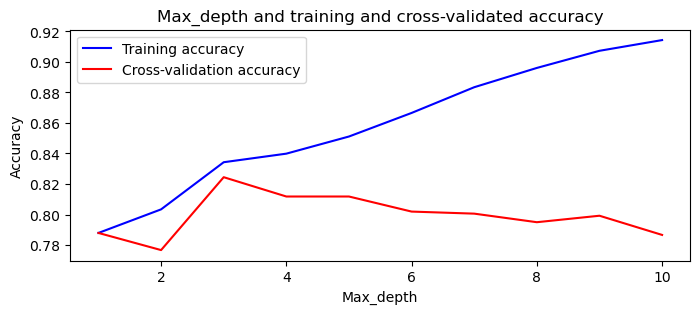

In [62]:
# Max_depth
max_depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 
train_accuracy = []
cross_accuracy = []

for depth in max_depth:
    clf = DecisionTreeClassifier(random_state=42, max_depth=depth) 
    cv_scores = cross_val_score(clf, X_train, y_train, cv=10) 
    mean_score = cv_scores.mean()
    cross_accuracy.append(mean_score)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_train) 
    train_accuracy.append(accuracy_score(y_train, y_pred))
    
plt.figure(figsize=(8, 3))
plt.plot(max_depth, train_accuracy , label='Training accuracy', color='blue') 
plt.plot(max_depth, cross_accuracy, label='Cross-validation accuracy', color='red') 
plt.title('Max_depth and training and cross-validated accuracy') 
plt.xlabel('Max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
# Max_depth and min_samples_leaf

from sklearn.model_selection import GridSearchCV 
grid = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'min_samples_split':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]} 

clf = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(clf, grid, cv=10) 
grid_search.fit(X_train, y_train)
model = grid_search.best_estimator_
model.fit(X_train,y_train)
y_hat = model.predict(X_train)

print('Best Parameters: ', grid_search.best_params_) 
print('Best train Accuracy: ', accuracy_score(y_hat,y_train)) 
print('Best Cross_Validation Accuracy: ', grid_search.best_score_)



Best Parameters:  {'max_depth': 3, 'min_samples_split': 1}
Best train Accuracy:  0.8342696629213483
Best Cross_Validation Accuracy:  0.8244522691705791


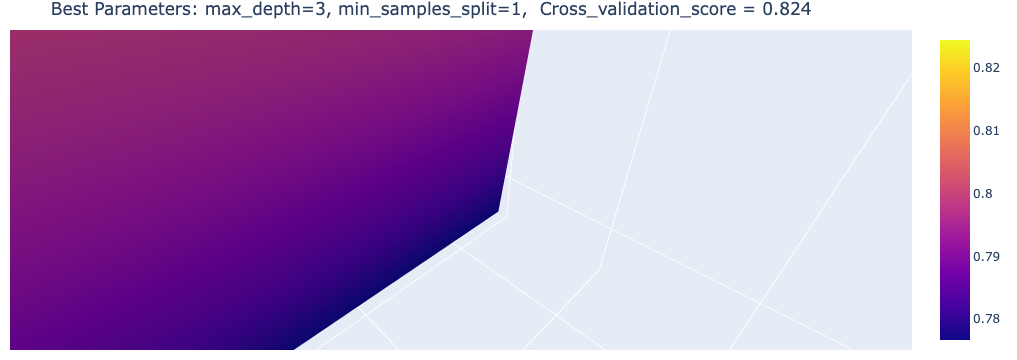

In [17]:
# Plot the 3d surface plot
result = grid_search.cv_results_
import plotly.graph_objects as go
figure = go.Figure(data=[go.Surface(z=np.array(result['mean_test_score']).reshape(10, 10), 
                                 x=grid['min_samples_split'], 
                                 y=grid['max_depth'])]) 

figure.update_layout(title = 'Best Parameters: max_depth=3, min_samples_split=1,  Cross_validation_score = 0.824',
                  scene = dict( 
                              xaxis_title='min_samples_split', 
                              yaxis_title='max_depth', 
                              zaxis_title='cross_validation accuracy'),
                  width=700,
                  margin=dict(r=20, b=10, l=10, t=30))

# plot the best parameters
figure.add_trace(go.Scatter3d(x=[grid_search.best_params_['min_samples_split']], 
                           y=[grid_search.best_params_['max_depth']],
                           z=[grid_search.best_score_], 
                           mode='markers',
                           marker=dict(
                            size=10, color='blue', opacity=0.8
                           ),
                           name='Best Parameters'))

# legend
figure.update_layout(legend=dict( yanchor="top",
    y=0.99, xanchor="left", x=0.01
)) 

figure.show()

Hold-out Test Set Accuracy Score:  0.799


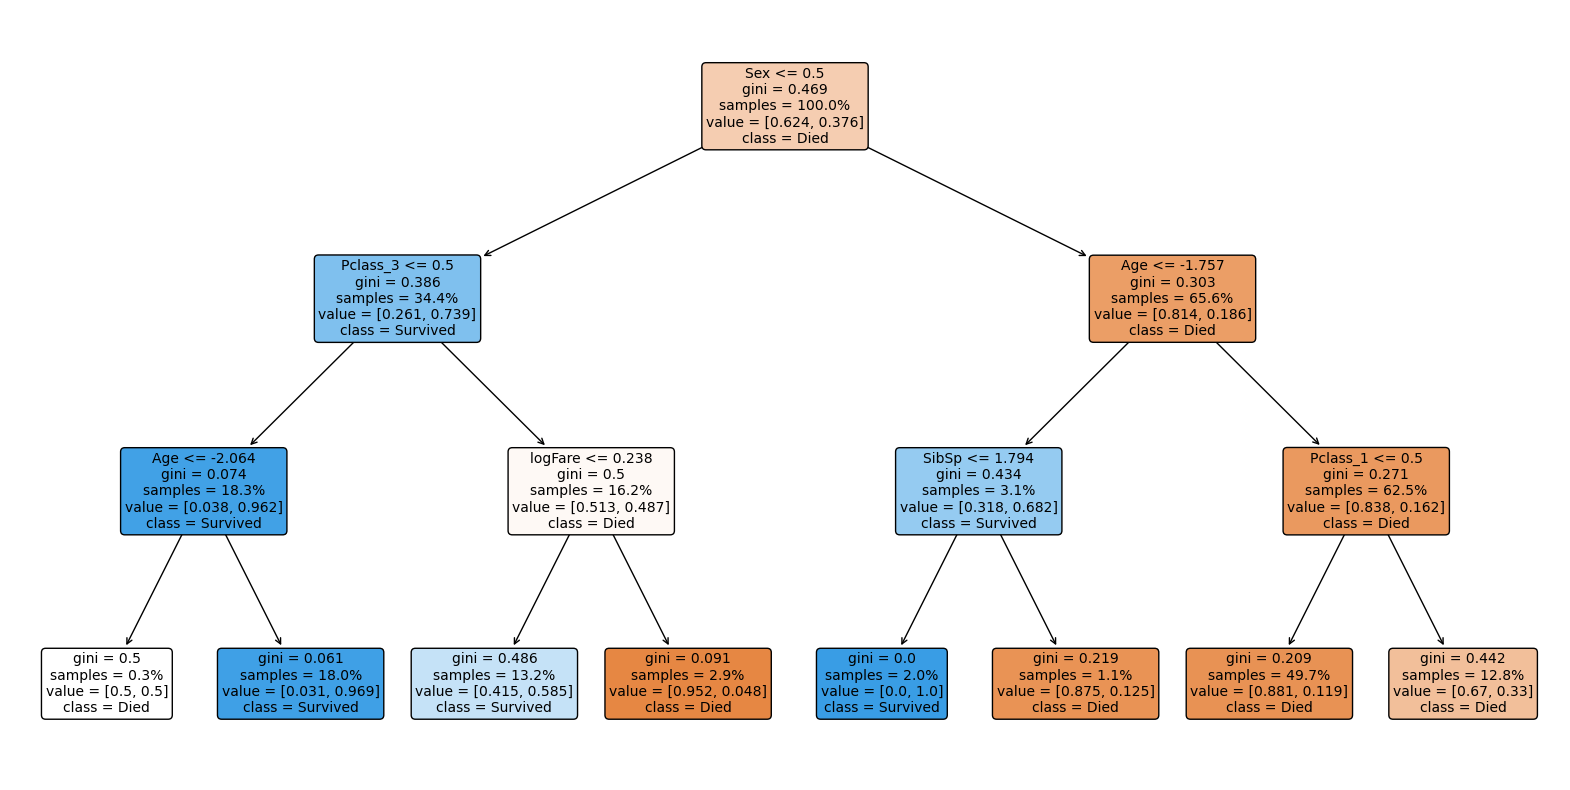

In [186]:
# Fit a single decision tree on all of the training data using those hyperparameters.
clf = grid_search.best_estimator_ 
clf.fit(X_train, y_train)

# Predict testing set
y_pred = clf.predict(X_test)

# Accuracy score
print('Hold-out Test Set Accuracy Score: ', round(accuracy_score(y_test, y_pred), 3))

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X_train.columns, class_names=['Died', 'Survived'], filled=True,fontsize=10, rounded=True, proportion=True)
plt.show()

### 2.4 Missing Data, Imputation and Feature Engineering

Have you been paying close attention to your features? If not, now is a good time to start. Perform analysis that allows you to answer the following questions:
* Recall from part 1 that some features have missing data. Which features have missingness?
* Try running the decision tree using all columns, including those with missing data. What happens?
* Use one of the methods we discussed in class to impute missing values for each feature. For each feature with missingness, describe the method used and why it is appropriate to the feature.
* Find a way to engineer meaningful features from the "Name" and/or "Cabin" fields in the data.
* Rerun your decision tree and SVM on the new dataset with imputed missing values and the new features, including re-selecting hyperparameters via cross validation. What do you notice?

### Recall from part 1 that some features have missing data. Which features have missingness?
Age, Cabin, and Embarked

In [29]:
miss_df = train.copy()

# Remove unused columns
miss_df = miss_df.drop(['Cabin', 'Name', 'PassengerId', 'Ticket'], axis=1)

# Change into numeric
miss_df['Sex'] = miss_df['Sex'].replace({'female': 0, 'male': 1})
miss_df['Embarked'] = miss_df['Embarked'].replace({'S': 0, 'C': 1, 'Q':2})

# Transforamtion
miss_df['logFare'] = np.log1p(miss_df['Fare'])
miss_df = miss_df.drop(['Fare'], axis =1)

# Standardization
scaler = StandardScaler()
miss_df[['Age', 'logFare', 'Parch', 'SibSp']] = scaler.fit_transform(miss_df[['Age', 'logFare', 'Parch', 'SibSp']])

# Dummy-encode 'Embarked' and 'Pclass'
miss_df = pd.get_dummies(miss_df, columns= ['Pclass', 'Embarked'])

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(miss_df.drop(['Survived'], axis=1),
                                                    miss_df['Survived'], test_size=0.2, random_state=42)

# Fit decision tree with 10-fold cross-validation
clf = DecisionTreeClassifier(random_state=42)
cv_scores = cross_val_score(clf, X_train, y_train, cv=10)

# print the tarining set accuracy score and cross-validated accuracy score.
clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)
print('Training Set Accuracy Score: ', round(accuracy_score(y_train, y_pred),2))
print('Cross-validated accuracy: {:.3f}'.format(cv_scores.mean(),cv_scores.std()))

# fit the model
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Hold-out Test Set Accuracy Score: ', round(accuracy_score(y_test, y_pred),2))


KeyError: "['Fare'] not found in axis"

### Try running the decision tree using all columns, including those with missing data. What happens?
It cannot deal with NA values. 

### Use one of the methods we discussed in class to impute missing values for each feature. For each feature with missingness, describe the method used and why it is appropriate to the feature.

For Age, I used median values to replace the missing values since the distrbution is skewed to the right. 
For Embarked, I used the mode to replace the missing values since there are only two values. 
For the Cabin, I plan to create a new label named 'missing' values since it has over 77%. I don't think simply replace them would work well. 

### Find a way to engineer meaningful features from the "Name" and/or "Cabin" fields in the data.
We can create different groups for name and cabin variables. 
For example, name variables, we can include Mr, Mrs, Miss. For cabin variable, we can group them by the initi letter.  

### Rerun your decision tree and SVM on the new dataset with imputed missing values and the new features, including re-selecting hyperparameters via cross validation. What do you notice?

In [17]:
# Deal with Cabin Variable.
train['Cabin_L'] = train['Cabin'].str[0]
train['Cabin_L'] = train['Cabin_L'].fillna('M')
print('Unique values in CabinLetter: ', train['Cabin_L'].unique())

Unique values in CabinLetter:  ['M' 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']


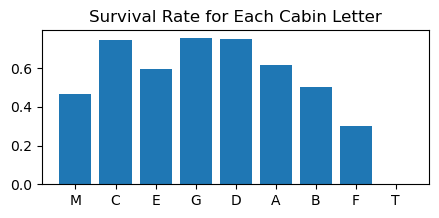

In [18]:
# Plot the survival rate for each cabin letter
plt.figure(figsize=(5, 2))
plt.bar(train['Cabin_L'].unique(), train.groupby('Cabin_L')['Survived'].mean())
plt.title('Survival Rate for Each Cabin Letter') 
plt.show()

In [19]:
df_im = df.copy()
df_im['Cabin_L'] = train['Cabin_L']
df_im['Cabin_L'] = df_im['Cabin_L'].replace({'M': 0, 'A': 1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'T': 8})


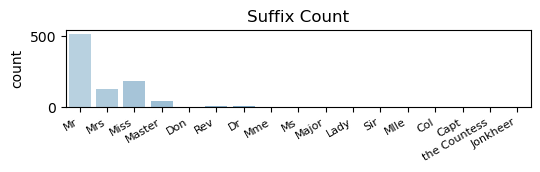

In [20]:
name_df = train['Name'].str.split(', ', expand=True)
name_df.columns = ['LastName', 'FirstName']
name_df['suffix'] = name_df['FirstName'].str.split('.', expand=True)[0] 

plt.figure(figsize=(6, 1))
sns.countplot(x='suffix', data=name_df, palette='Blues_d', alpha=0.8) 
plt.xlabel('')
plt.xticks(rotation=30, ha='right', fontsize=8)
plt.title('Suffix Count')
plt.show()

In [21]:
df_im['SufMrs'] = name_df['suffix'].isin(['Mrs', 'Mme', 'Mlle']).astype(int)
df_im['SufMiss'] = name_df['suffix'].isin(['Miss', 'Ms']).astype(int)
df_im['SufMr'] = name_df['suffix'].isin(['Mr']).astype(int)
df_im['SufLord'] = 1 - name_df['suffix'].isin(['Mrs', 'Mme', 'Mlle', 'Miss', 'Ms', 'Mr']).astype(int) 
df_im.head()

Survived  Sex       Age     SibSp     Parch   logFare  Pclass_1  Pclass_2  \
0         0    1 -0.565736  0.432793 -0.473674 -0.879741         0         0   
1         1    0  0.663861  0.432793 -0.473674  1.361220         1         0   
2         1    0 -0.258337 -0.474545 -0.473674 -0.798540         0         0   
3         1    0  0.433312  0.432793 -0.473674  1.062038         1         0   
4         0    1  0.433312 -0.474545 -0.473674 -0.784179         0         0   

   Pclass_3  Embarked_0.0  Embarked_1.0  Embarked_2.0  Embarked_S  Cabin_L  \
0         1             1             0             0           0        0   
1         0             0             1             0           0        3   
2         1             1             0             0           0        0   
3         0             1             0             0           0        3   
4         1             1             0             0           0        0   

   SufMrs  SufMiss  SufMr  SufLord  
0       0        0      1        0  
1       1        0      0        0  
2       0        1      0        0  
3       1        0      0        0  
4       0        0      1        0

In [22]:
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(df_im.drop(['Survived'], axis=1),
                                                    df_im['Survived'], test_size=0.2, random_state=42)
grid = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

clf = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(clf, grid, cv=10) 
grid_search.fit(X_train, y_train)
model = grid_search.best_estimator_
model.fit(X_train,y_train)
y_hat = model.predict(X_train)
accuracy_score(y_hat,y_train)

print('Best Parameters: ', grid_search.best_params_)
print('Best Train Accuracy: ', round(accuracy_score(y_hat,y_train),3))
print('Best Cross Validation Accuracy: ', round(grid_search.best_score_,3))

# Fit a single decision tree on all of the training data using those hyperparameters.
results = grid_search.cv_results_
clf = grid_search.best_estimator_ 
clf.fit(X_train, y_train)

# Predict testing set
y_pred = clf.predict(X_test)

# Accuracy score
print('Hold-out Test Set Accuracy Score: ', round(accuracy_score(y_test, y_pred), 3))

Best Parameters:  {'max_depth': 4, 'min_samples_split': 1}
Best Train Accuracy:  0.844
Best Cross Validation Accuracy:  0.816
Hold-out Test Set Accuracy Score:  0.827


The Cross_Validation Accuracy is smaller than previous one, but test accuracy is higher. 

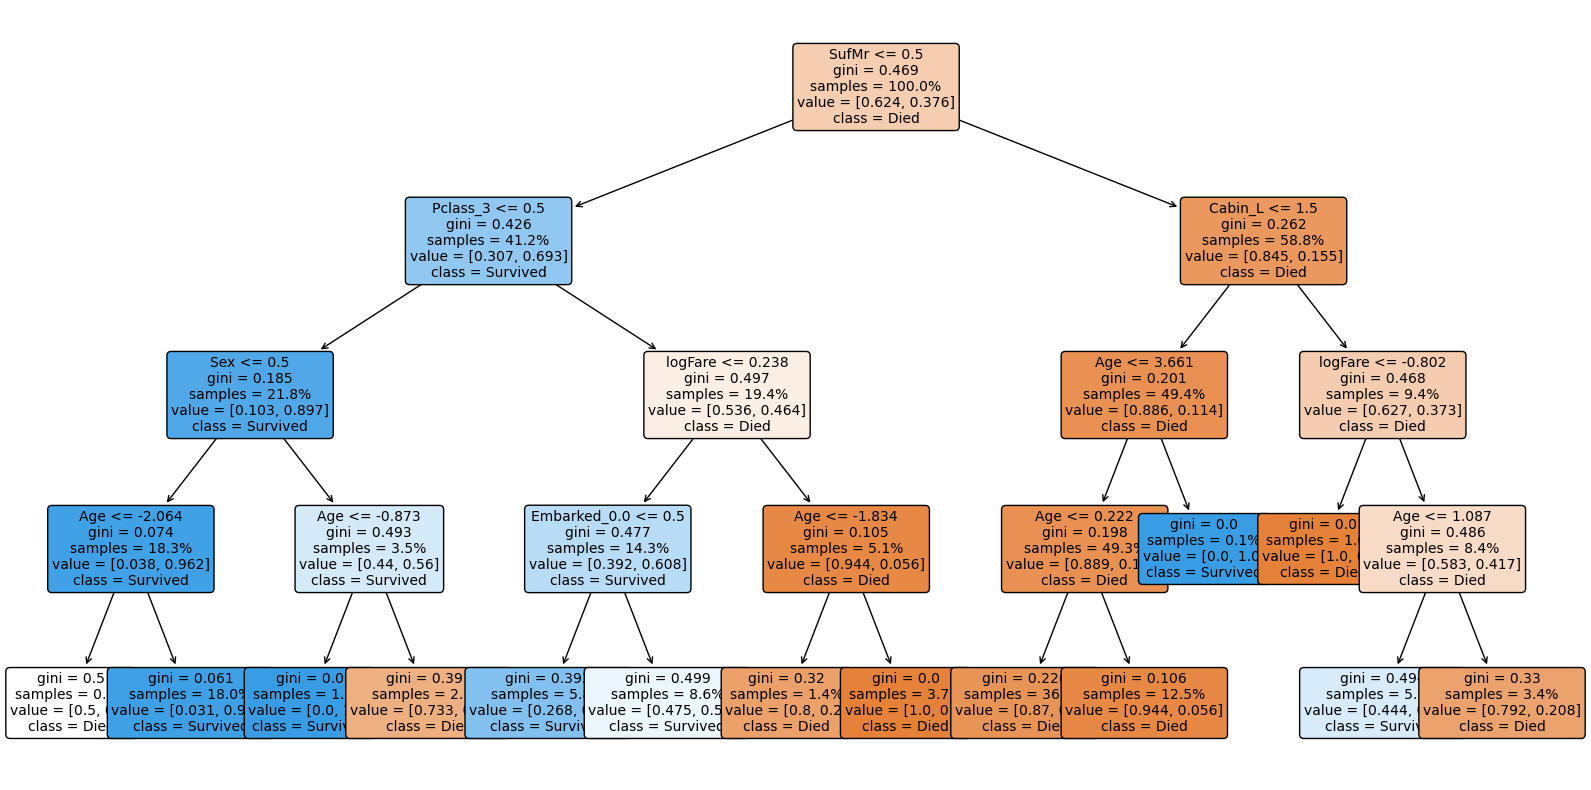

In [23]:
# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X_train.columns, class_names=['Died', 'Survived'], filled=True,fontsize=10, rounded=True, proportion=True)
plt.show()

### 2.5 ROC Curve

For your best decision tree from 2.4, plot the reciever operating characteristic (ROC) curve on the test set data. Report the area under the curve (AUC) score. *Hint*: scikit-learn's built-in predict_proba function may be helpful for this problem.  For each model, identify the point on the ROC curve that is closest to the top-left corner, and identify the associated probability threshold for classification. Place a vertical line on your plot indicating the FPR value at the threshold. Finally, report accuracy on the test set using the threshold you identified. Comparing to the accuracy from 2.4, what do you observe? 

AUC-ROC Score:  0.884
Best Threshold:  0.5
Test Set Accuracy Score with Best Threshold:  0.827
FPR at Best Threshold:  0.142


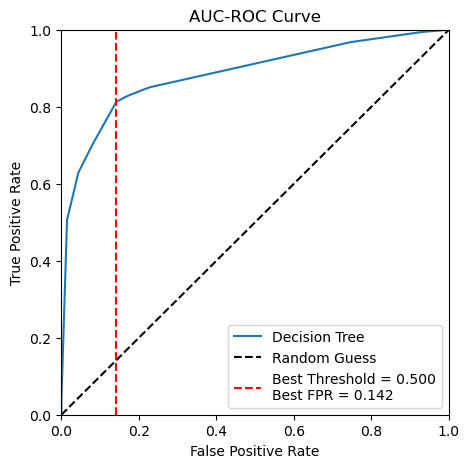

In [24]:
# Plot AUC-ROC curve with predict probability
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_p = clf.predict_proba(df_im.drop(['Survived'], axis=1))[:, 1] 
fpr, tpr, thresholds = roc_curve(df_im['Survived'], y_pred_p)

# AUC-ROC score
print('AUC-ROC Score: ', round(roc_auc_score(df_im['Survived'], y_pred_p),3))

# Best threshold
best_threshold = thresholds[np.argmax(tpr - fpr)] 
print('Best Threshold: ', round(best_threshold,3))

# Accuracy  with the best threshold on the testing set
y_pred = (clf.predict_proba(X_test)[:, 1] >= best_threshold).astype(bool)

print('Test Set Accuracy Score with Best Threshold: ', round(accuracy_score(y_test, y_pred),3))

# Plot the AUC-ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, label='Decision Tree')
plt.plot([0, 1], [0, 1], 'k--')

# Plot the fpr associated with best threshold as vertical line 
threshold_fpr = fpr[np.argmax(tpr - fpr)]
print('FPR at Best Threshold: ', round(threshold_fpr,3)) 
plt.axvline(x=threshold_fpr, color='r', linestyle='--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
plt.legend(['Decision Tree', 'Random Guess','Best Threshold = {:.3f}\nBest FPR = {:.3f}'.format(best_threshold, threshold_fpr)])
plt.show()

The test accuracy is higher. 

## Part 3: Many Trees

### 3.1: Random Forest
Use the [random forest classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to predict survival on the titanic. Use cross-validation on the training data to choose the best hyper-parameters --- including the maximum depth, number of trees in the forest, and the minimum samples per leaf.
* What hyperparameters did you select with cross-validation? You should use cross-validation to select all of the hyperparameters (i.e. search a grid of hyperparameters), and report the combination that maximizes cross-validated accuracy). You can use fewer cross validation folds than the 10 folds from previous problems, to keep your code from taking too long to run. _Hint:_ sklearn's [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) might be useful for this part
* How does the cross-validated performance (average across validation folds) compare to the test performance (using the top-performing, fitted model selected through cross-validation)?
* How does the RF performance compare to the decision tree from part 2.4?
* Create 3 subplots that show how cross-validated performance (y-axis) relates to the number of trees in the forest (x-axis), maximum depth (x-axis), and minimum samples per leaf (x-axis). What do you observe?

In [26]:
# GridSearchCV for Random Forest
grid = {'n_estimators': [10, 50, 100, 150],
        'max_depth': [5, 10, 15, 20],
        'min_samples_split': [1, 5, 10, 15]}

from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier(random_state=42) 
grid_search = GridSearchCV(clf, grid, cv=10)
X_train, X_test, y_train, y_test = train_test_split(df_im.drop(['Survived'], axis=1), 
                                                    df_im['Survived'], test_size=0.2,
                                                    random_state=42)
grid_search.fit(X_train, y_train)
model = grid_search.best_estimator_
model.fit(X_train,y_train)
y_hat = model.predict(X_train)

print('Best Parameters: ', grid_search.best_params_)
print('Best Train Accuracy : ', round(accuracy_score(y_hat,y_train), 3))
print('Best Cross Validation Accuracy : ', round(grid_search.best_score_, 3))


Best Parameters:  {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 100}
Best Train Accuracy :  0.862
Best Cross Validation Accuracy :  0.839


In [204]:
# Best estimator
clf = grid_search.best_estimator_ 

# Predict the testing set
y_pred = clf.predict(X_test)

# Accuracy score
print('Hold-out Test Set Accuracy Score: ', round(accuracy_score(y_test, y_pred),3))

Hold-out Test Set Accuracy Score:  0.81


Cross-validation performs better than the test performance.

Compare to the decision tree from part 2.4, RF performs better with larger cross validation accuracy score.

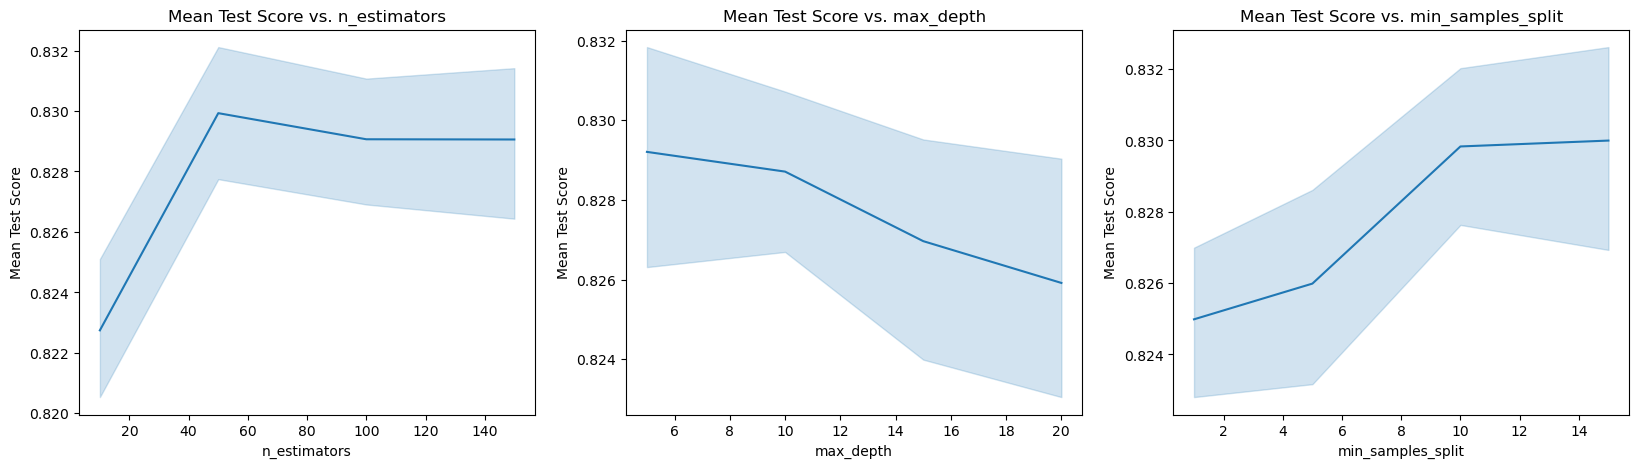

In [216]:
result = grid_search.cv_results_
result_df = pd.DataFrame(result)

# Create 3 subplots
figure, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))
sns.lineplot(x='param_n_estimators', y='mean_test_score', data=result_df, ax=ax1)
ax1.set_title('Mean Test Score vs. n_estimators')
ax1.set_xlabel('n_estimators')
ax1.set_ylabel('Mean Test Score')

# Plot the mean test score for each max_depth
sns.lineplot(x='param_max_depth', y='mean_test_score', data=result_df, ax=ax2) 
ax2.set_title('Mean Test Score vs. max_depth')
ax2.set_xlabel('max_depth')
ax2.set_ylabel('Mean Test Score')

# Plot the mean test score for each min_samples_split
sns.lineplot(x='param_min_samples_split', y='mean_test_score', data=result_df, ax=ax3) 
ax3.set_title('Mean Test Score vs. min_samples_split') 
ax3.set_xlabel('min_samples_split')
ax3.set_ylabel('Mean Test Score')
plt.show()

It is interesting to see that the n_estimator is highest at 50 while we got best estimator has n_estimators of 100. 
Thus, we might need to try different paramaters to compare the results. 

### 3.2: Gradient Boosting

Use the [Gradient Boosting classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) to predict survival on the Titanic. Tune your hyperparameters with cross validation. Again, you should tune more parameteres than just `max_depth`.
* How does the GBM performance compare to the other models?
* Create a figure showing the feature importances in your final model (with properly tuned hyperparameters)


In [25]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

# Define the Gradient Boosting classifier and hyperparameter grid
gb_clf = GradientBoostingClassifier()
param_grid = {
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(gb_clf, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
model = grid_search.best_estimator_
model.fit(X_train,y_train)
y_hat = model.predict(X_train)

# Print the best hyperparameters and accuracy
print("Best hyperparameters: ", grid_search.best_params_)
print("CV Accuracy: ", grid_search.best_score_)
print("Train Accuracy: ", accuracy_score(y_hat,y_train))

Best hyperparameters:  {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
CV Accuracy:  0.830089628681178
Train Accuracy:  0.922752808988764


In [223]:
# get the best estimator
clf = grid_search.best_estimator_ # train on entire training set clf.fit(X_train, y_train)
# predict the test set
y_pred = clf.predict(X_test)
# print the accuracy score
print('Hold-out Test Set Accuracy Score: ', round(accuracy_score(y_test, y_pred),3))

Hold-out Test Set Accuracy Score:  0.827


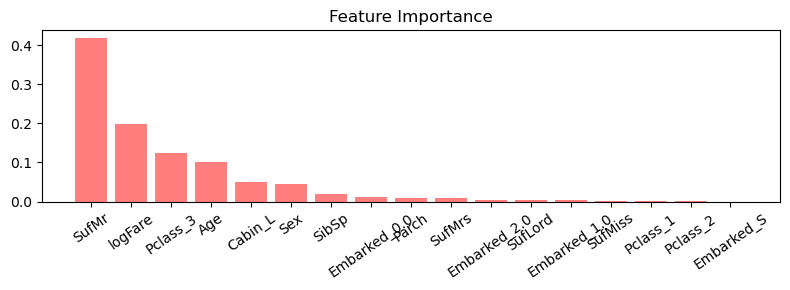

In [226]:
# Feature importance
importance = clf.feature_importances_
plt.figure(figsize=(8, 3))

# Sort the feature importance 
idx = np.argsort(importance)[::-1]
plt.bar(X_train.columns[idx], importance[idx], color='red', align='center', alpha=0.5) 
plt.title('Feature Importance')
plt.xticks(rotation=35)
plt.tight_layout()
plt.show()

It performs better than the other with higher test accuracy.  

## Part 4: Neural Networks

Carry on the classification by using feed forward neural networks, using functionality imported from [keras](https://keras.io/api/). You are responsible for choosing the number of layers, their corresponding size, the activation functions and the choice of gradient descent algorithm (and its parameters e.g. learning rate). Pick those parameters by hand. For some of them you can also perform cross-validation if you wish, but cross validation is not required. Your goal is to tune those parameters so that your test accuracy is at least above 75%. 

Report your accuracy on the test set along with your choice of parameters. More specifically, report the number of layers, their size, the activation functions and your choice of optimization algorithm. 

It is a good exercise to experiment with different optimizers (gradient descent, stochastic gradient descent, AdaGrad etc), learning rates, batch sizes etc. to get a feeling of how they affect neural network training. Experiment with some of these options. What do you observe?

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Define the neural network architecture and hyperparameters
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
optimizer = Adam(lr=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
_, accuracy = model.evaluate(X_test, y_test)
print("Accuracy on test set: ", accuracy)

# Its test accuracy is better than gradient boosting, which is similar to random forest. But its training perforance is better than random forest. 

## Part 5: Putting it all together!

Create a final table that summarizes the performance of your models as follows. What do you observe? Are there trends in which models and hyperparameters work best?

| Model | Cross-validated Performance   | Train Performance | Test Performance | Chosen Hyperparameters | 
|------|------|------| | |
|   Decision Tree        |  |  |  |  |
|   Decision Tree (with imputed missing values and new features) |  |  |  |  |
|   Random Forest        |  |  |  |  |
|   Random Forest (with imputed missing values and new features)        |  |   |  | |
|   Gradient Boosting    |  |  |  |  |
|   Gradient Boosting (with imputed missing values and new features)        |  |  |  |  |
|   Neural Network    |  |  |  |  |
|   Neural Network (with imputed missing values and new features)        |  |   |  |  |

In [30]:
# Random Forest with original data
grid = {'n_estimators': [10, 50, 100, 150],
        'max_depth': [5, 10, 15, 20],
        'min_samples_split': [1, 5, 10, 15]}

from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier(random_state=42) 
grid_search = GridSearchCV(clf, grid, cv=10)
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Survived'], axis=1), 
                                                    df['Survived'], test_size=0.2,
                                                    random_state=42)
grid_search.fit(X_train, y_train)
model = grid_search.best_estimator_
model.fit(X_train,y_train)
y_hat = model.predict(X_train)

print('Best Parameters: ', grid_search.best_params_)
print('Best Train Accuracy : ', round(accuracy_score(y_hat,y_train), 3))
print('Best Cross Validation Accuracy : ', round(grid_search.best_score_, 3))


Best Parameters:  {'max_depth': 10, 'min_samples_split': 15, 'n_estimators': 10}
Best Train Accuracy :  0.876
Best Cross Validation Accuracy :  0.824


In [31]:
# Best estimator
clf = grid_search.best_estimator_ 

# Predict the testing set
y_pred = clf.predict(X_test)

# Accuracy score
print('Hold-out Test Set Accuracy Score: ', round(accuracy_score(y_test, y_pred),3))

Hold-out Test Set Accuracy Score:  0.816


In [ ]:
#Gradient Random Forest with original data

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

# Define the Gradient Boosting classifier and hyperparameter grid
gb_clf = GradientBoostingClassifier()
param_grid = {
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(gb_clf, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
model = grid_search.best_estimator_
model.fit(X_train,y_train)
y_hat = model.predict(X_train)

# Print the best hyperparameters and accuracy
print("Best hyperparameters: ", grid_search.best_params_)
print("CV Accuracy: ", grid_search.best_score_)
print("Train Accuracy: ", accuracy_score(y_hat,y_train))


Best hyperparameters:  {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
CV Accuracy:  0.8272924258839751
Train Accuracy:  0.9620786516853933


In [33]:
# best estimator
clf = grid_search.best_estimator_ # train on entire training set clf.fit(X_train, y_train)
# predict the test set
y_pred = clf.predict(X_test)
# print the accuracy score
print('Hold-out Test Set Accuracy Score: ', round(accuracy_score(y_test, y_pred),3))

Hold-out Test Set Accuracy Score:  0.827


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Define the neural network architecture and hyperparameters
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
optimizer = Adam(lr=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
_, accuracy = model.evaluate(X_test, y_test)
print("Accuracy on test set: ", accuracy)

In [64]:
# create pandas df with column names: [model, CVPerformance, TestPerformance, Hyperparameters]
import pandas as pd
summary = pd.DataFrame(columns=['model', 'Cross-validated Performance', 'Train Performance', 'Test Performance', 'Chosen Hyperparameters']) 

summary = summary.append({'model': 'Decision Tree',
                            'Cross-validated Performance': 0.824,
                          'Train Performance': 0.834,
                            'Test Performance': 0.799,
                            'Chosen Hyperparameters': {'max_depth': 3, 'min_samples_split': 1}}, ignore_index=True)

summary = summary.append({'model': 'Decision Tree (with imputed missing values and new features)',
                            'Cross-validated Performance':0.824,
                          'Train Performance': 0.844,
                            'Test Performance': 0.799,
                            'Chosen Hyperparameters': {'max_depth': 3, 'min_samples_split': 2}}, ignore_index=True)

summary = summary.append({'model': 'Random Forest',
                            'Cross-validated Performance':0.824,
                          'Train Performance': 0.876,
                            'Test Performance': 0.816,
                            'Chosen Hyperparameters': {'max_depth': 10, 'min_samples_split': 15}}, ignore_index=True)

summary = summary.append({'model': 'Random Forest (with imputed missing values and new features)',
                            'Cross-validated Performance':0.839,
                           'Train Performance': 0.862,
                            'Test Performance': 0.81,
                            'Chosen Hyperparameters': {'max_depth': 5, 'min_samples_split': 10}}, ignore_index=True)

summary = summary.append({'model': 'Gradient Boosting',
                            'Cross-validated Performance':0.827,
                          'Train Performance': 0.962,
                            'Test Performance': 0.827,
                            'Chosen Hyperparameters': {'max_depth': 5, 'min_samples_split': 1}}, ignore_index=True)


summary = summary.append({'model': 'Gradient Boosting (with imputed missing values and new features)',
                            'Cross-validated Performance': 0.83,
                          'Train Performance': 0.923,
                            'Test Performance': 0.724,
                            'Chosen Hyperparameters': {'max_depth': 3, 'min_samples_split': 1}}, ignore_index=True)


summary = summary.append({'model': 'Neural Network (with imputed missing values and new features)',
                            'Cross-validated Performance': 0.839,
                          'Train Performance': 0.884,
                            'Test Performance': 0.81,
                            'Chosen Hyperparameters': 'default'}, ignore_index=True)

# Show the entire summary_df with no truncation in any cell and no index
pd.set_option('display.max_colwidth', None) 
pd.set_option('display.max_rows', None)
summary.style.hide_index()

/var/folders/z1/j91g8rbs0z5_97z1vqszz6lw0000gn/T/ipykernel_28538/2516796909.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append({'model': 'Decision Tree',
/var/folders/z1/j91g8rbs0z5_97z1vqszz6lw0000gn/T/ipykernel_28538/2516796909.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append({'model': 'Decision Tree (with imputed missing values and new features)',
/var/folders/z1/j91g8rbs0z5_97z1vqszz6lw0000gn/T/ipykernel_28538/2516796909.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append({'model': 'Random Forest',
/var/folders/z1/j91g8rbs0z5_97z1vqszz6lw0000gn/T/ipykernel_28538/2516796909.py:23: FutureWarning: The frame.append method is deprecated and will

In [ ]:
To my suprised, the results before imputing missing values and new features are better than after. Gradient Boosting with original data works best from my result. 